In [3]:
import keras.losses
keras.losses.custom_loss = triplet_loss

Using TensorFlow backend.


In [2]:
def triplet_loss(y_true, y_pred, alpha = 0.2):  
    anchor, positive, negative = y_pred[:,0], y_pred[:,1], y_pred[:,2]
    print(anchor, positive, negative)
    pos_dist = tf.reduce_sum(tf.square(anchor - positive))
    neg_dist = tf.reduce_sum(tf.square(anchor - negative))
    basic_loss = pos_dist - neg_dist + alpha
    loss = tf.maximum(basic_loss, 0)
    return loss

In [ ]:
tf.__version__

In [21]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 220, 1) 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 150, 220, 1) 0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 150, 220, 1) 0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 128)          4560064     input_1[0][0]                    
                                                                 input_2[0][0]              

In [24]:
import cv2
import os
import numpy as np
import pandas as pd
import tensorflow as tf
#tf.enable_eager_execution()
import numpy.linalg as lin
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Model,load_model
#model=load_model('weights_siamese.hdf5')
model =load_model('wights-siamese-single-model.hdf5', custom_objects={'triplet_loss': triplet_loss})
#model =load_model('weights_siamese.hdf5', custom_objects={'triplet_loss': triplet_loss})

#model=load_model('weights-final.hdf5')
#last_layer = model.layers[-4].output
#model1 = Model(model.inputs, last_layer)


In [26]:
model.layers

In [ ]:
import tensorflow as tf


In [ ]:
model.layers

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1_1 (Conv2D)             (None, 148, 218, 96)      960       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 218, 96)      384       
_________________________________________________________________
conv1_2 (Conv2D)             (None, 146, 216, 96)      83040     
_________________________________________________________________
batch_normalization_1 (Batch (None, 146, 216, 96)      384       
_________________________________________________________________
conv1_3 (Conv2D)             (None, 144, 214, 96)      83040     
_________________________________________________________________
batch_normalization_2 (Batch (None, 144, 214, 96)      384       
_________________________________________________________________
conv1_4 (Conv2D)             (None, 71, 106, 96)       8

In [ ]:
model.layers[0]

In [ ]:
#weights = model.weights
#weights2 = weights[:-5]
model.layers[3].output

In [ ]:
tf.enable_eager_execution()


model.write()

In [ ]:
from skimage.transform import resize
def load_signature(path):
    return img_as_ubyte(resize(imread(path, as_gray=True),(150,220)))

In [5]:
# loc="test/"
# for layer in model.layers:
#     layer.trainable=False
def img_to_encoding(image_path, model):
    img1 = cv2.imread(image_path)
    img1 = cv2.resize(img1, (150,220))
    img1 = np.array([cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)]).transpose()
    img = np.around(img1/255.0, decimals=12)
    x_train = np.array([img])
    embedding = model.predict_on_batch(x_train)
    return embedding
# database = {}
# for file in os.listdir(loc):
#     database[file]=img_to_encoding(loc+file,model)
# test_image="1.png"
# test_image_loc="/home/anuja/Downloads/signature_dataset/test/"


In [35]:
data=pd.read_csv('sig_test.csv')


In [36]:
data.head

<bound method NDFrame.head of                 img
0    ../test/a1.png
1    ../test/a2.png
2    ../test/b1.png
3    ../test/b2.png
4    ../test/c1.png
5    ../test/c2.png
6    ../test/d1.png
7    ../test/d2.png
8    ../test/e1.png
9    ../test/e2.png
10  ../test/ef1.png
11   ../test/f1.png
12   ../test/f2.png
13  ../test/gf1.jpg
14  ../test/gf2.png
15   ../test/h1.png
16   ../test/h2.png
17  ../test/hf1.png
18   ../test/i1.png
19   ../test/i2.png
20   ../test/j1.png
21   ../test/j2.png>

In [37]:
def read_image(i):
    img1 = cv2.imread(data.loc[i,"img"])
    img1 = cv2.resize(img1, (220,150))
    img1 = np.moveaxis(np.array([cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)]),0,-1)
    return (img1/255.).astype('float32')
    
def plot_sig(img1,img2,i,j):
    f, ax = plt.subplots(1,2)
    ax[0].imshow(np.squeeze(img1))
    ax[1].imshow(np.squeeze(img2))
    ax[0].set_title(i)
    ax[1].set_title(j)

def model_output(model1,img1,img2):
    img1=np.reshape(img1,(-1,150,220,1))
    #png full_forg/forgeries_1_print(img1.shape)
    img1_model=np.array(model1(img1))
    img2_model=np.array(model1(np.reshape(img2,(-1,150,220,1))))
    img1_model=img1_model/img1_model.max()
    img2_model=img2_model/img2_model.max()
    #print(img1_model,img2_model)
    return(lin.norm(img1_model-img2_model))

In [67]:
def img_to_encoding(image_path, model):
    img1 = cv2.imread(image_path)
    img1 = cv2.resize(img1, (220,150))
    img1 = np.moveaxis(np.array([cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)]),0,-1)
#     img1 = cv2.resize(img1, (150,220))
    print(img1.shape)
#     img1 = np.array([cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)]).transpose()
    print(img1.shape)
    show_image(img1,"hello")
    img = np.around(img1/255.0, decimals=12)
    x_train = np.array([img])
    embedding = model.predict_on_batch(x_train)
    return embedding


In [28]:
img1 = cv2.imread('../test/a1.png')

In [30]:
img1.shape

(709, 1193, 3)

In [9]:
x=np.array(model(np.reshape(img1,(-1,150,220,1))))

ValueError: cannot reshape array of size 2537511 into shape (150,220,1)

In [10]:
model.layers

In [55]:
print(lin.norm(emb-emb2))
print(lin.norm(emb2))


0.6769496
433.0719


(150, 220, 1)
(150, 220, 1)


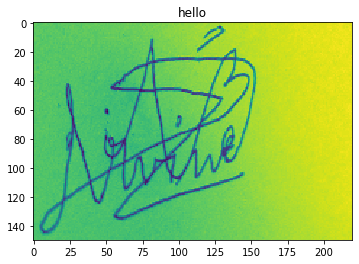

In [68]:
# emb=img_to_encoding("../test/a1.png", model)
# emb2=img_to_encoding("../test/a2.png", model)
emb=img_to_encoding("../test/gf2.png", model)


(150, 220, 1)
(150, 220, 1)


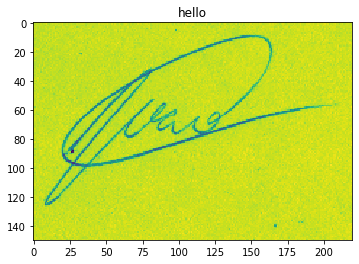

In [69]:
emb2=img_to_encoding("../test/a1.png", model)


In [ ]:
for i in range(100):
    img1 = read_image(i)
    #show_image(img1,i)
    img1_model=model1(np.reshape(img1,(-1,150,220,1)))
    x=np.array(img1_model)
    x=x/x.max()
    print(data.loc[i,"img"],lin.norm(x))
    

In [ ]:
for i in range(len(data)):
    img1 = read_image(i)
    

In [ ]:
img1 =  read_image(j)
img1=np.reshape(img1,(-1,150,220,1))
img1_model=model1(np.reshape(img1,(-1,150,220,1)))
print(img1_model)


In [60]:
def show_image(img1,i):
    #f, ax = plt.subplots(1,2)
    plt.imshow(np.squeeze(img1))
    plt.title(i)


In [59]:
def show_image(img):
    #img = cv2.resize(img, (300, 200))        
    cv2.imshow("img", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
img1=read_image(6)
img2=read_image(7)
plot_sig(img1,img2,6,7)

In [ ]:
img1 = cv2.imread(data.loc[6,"img"])
#show_image(img1)
img1 = cv2.resize(img1, (220,150))
#show_image(img1)
#print(img1.shape)
img1 = np.moveaxis(np.array([cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)]),0,-1)
show_image(img1)
# show_image((img1/255.).astype('float32'))


In [ ]:
img1=cv2.resize(img1, (220,150))
show_image(kimg1)

In [ ]:
img1.shape

In [ ]:
import random
random.randrange(20, 50)

In [ ]:
data["yforg"]==1